In [127]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np

from ipywidgets import interact, fixed # pour les outils interactifs
import ipywidgets as widgets

In [201]:
plate_name = ["A","B","C"]
az = [0,135,270]
style = ["fault","fault","fault"]
sign = ["+","+","-"]
linestyle_dict={"trench":"-","rift":"-","fault":"-"}

In [202]:
def polar2cart(r,theta):
    rad = np.deg2rad(theta)
    return r * np.append([np.sin(rad)],[np.cos(rad)],axis=0).T

In [176]:
plate_loc = (u + np.roll(u,1,axis=0)).T
print(np.linalg.norm(plate_loc,axis=0))
plate_loc *= 0.6 * L/ np.linalg.norm(plate_loc,axis=0)
print(np.linalg.norm(plate_loc,axis=0))
plate_loc = plate_loc.T

[1.41421356 0.76536686 0.76536686]
[0.6 0.6 0.6]


In [206]:
az

[0, 135, 270]

In [207]:
az_plate = 0.5*(az + np.roll(az,1))+[180,0,0]

array([315. ,  67.5, 202.5])

In [208]:
def plot_plates(az,style,sign):
    L = 1
    u = polar2cart(L,az)
    
    az_plate = 0.5*(az + np.roll(az,1))+[180,0,0]
    u_plate = polar2cart(0.75,az_plate)
    
    for style_i, sign_i, az_i, u_i in zip(style,sign,az,u):
        n = np.array([u_i[1], -u_i[0]])
        if style_i == "rift":
            delta = 0.02
            plt.plot([0,u_i[0]]+delta*n[0],[0,u_i[1]]+delta*n[1],c="k")
            plt.plot([0,u_i[0]]-delta*n[0],[0,u_i[1]]-delta*n[1],c="k")
        elif style_i == "trench":
            plt.plot([0,u_i[0]],[0,u_i[1]],c="k")

            delta = 0.02 if sign_i == "+" else -0.03
            pos = np.linspace([0,0],u_i,10)[1:] + delta * n

            m = MarkerStyle(">" if sign_i == "+" else "<")
            m._transform.rotate_deg(-az_i)
            plt.plot(pos[:,0],pos[:,1], c="k", linestyle="", marker= m)
        elif style_i == "fault":
            plt.plot([0,u_i[0]],[0,u_i[1]],c="k")
            delta = 0.05
            sign_val = 1 if sign_i =="+" else -1
            plt.annotate("",xy= 0.45*L*u_i +sign_val* delta*n, xytext= 0.65*u_i +sign_val* delta*n, arrowprops=dict(arrowstyle="->"))
            plt.annotate("",xy= 0.65*L*u_i -sign_val* delta*n, xytext= 0.45*u_i -sign_val* delta*n, arrowprops=dict(arrowstyle="->"))
        else:
            plt.plot([0,u_i[0]],[0,u_i[1]],c="k")

    for plate_name_i,plate_loc_i in zip(plate_name, u_plate):
        plt.annotate(plate_name_i,xy= plate_loc_i)

    plt.gca().set_aspect("equal")
    plt.gca().set_xlim(-1.2,1.2)
    plt.gca().set_ylim(-1.2,1.2)

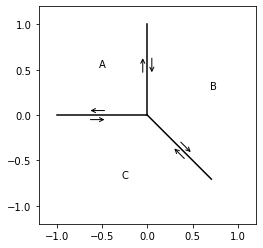

In [209]:
plot_plates(az, style, sign)

In [228]:
az = [0,135,270]
pad = 15
az_AB_widget = widgets.FloatSlider(min=az[2]-360+pad,max=az[1]-pad,step=1,value=az[0], continuous_update=False)
az_BC_widget = widgets.FloatSlider(min=az[0]+pad,max=az[2]-pad,step=1,value=az[1], continuous_update=False)
az_AC_widget = widgets.FloatSlider(min=az[1]+pad,max=360+az[0]-pad,step=1,value=az[2], continuous_update=False)

def when_AB_changes(change):
    az_AC_widget.max = change.new +360 - pad
    az_BC_widget.min = change.new + pad
def when_BC_changes(change):
    az_AB_widget.max = change.new - pad
    az_AC_widget.min = change.new + pad
def when_AC_changes(change):
    az_BC_widget.max = change.new - pad
    az_AB_widget.min = change.new - 360 + pad
az_AB_widget.observe(when_AB_changes, names="value")
az_BC_widget.observe(when_BC_changes, names="value")
az_AC_widget.observe(when_AC_changes, names="value")
#widgets.jsdlink((az_AB_widget,"value"),(az_BC_widget,"min"))

@interact(
az_AB = az_AB_widget,
az_BC = az_BC_widget,
az_AC = az_AC_widget
)
def interact_plate(az_AB, az_BC, az_AC):
    az= [az_AB, az_BC, az_AC]
    plot_plates(az,style,sign)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='az_AB', max=120.0, min=-75.…

In [224]:
az_AB_widget.max

120.0